In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import math

import corner

# Machine learning
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

In [2]:
galaxyquasar = pd.read_csv('galaxyquasar.csv')

galaxyquasar

,u,g,r,i,z,class,z1,zerr
0,18.97213,18.53676,18.58280,18.34936,18.29215,QSO,0.522819,0.000155
1,19.24592,17.47646,16.47817,16.04472,15.68851,GALAXY,0.122846,0.000028
2,19.43536,17.70268,16.91565,16.58327,16.39128,GALAXY,0.000000,0.000000
3,19.31626,18.18312,17.39591,16.94549,16.65395,GALAXY,0.147435,0.000009
4,19.28828,19.11188,18.88937,18.80013,18.49183,QSO,2.011455,0.000631
...,...,...,...,...,...,...,...,...
49995,19.37295,18.12382,17.39886,16.98503,16.70585,GALAXY,0.113016,0.000011
49996,18.52021,16.88262,16.03280,15.56884,15.22454,GALAXY,0.085063,0.000014
49997,18.62718,17.30876,16.87371,16.62399,16.42296,GALAXY,0.054429,0.000008
49998,19.55140,18.27711,17.62101,17.21947,17.03347,GALAXY,0.112571,0.000009


In [3]:
# Convert to NaN any np.inf or '' value
galaxyquasar[(galaxyquasar == np.inf) | (galaxyquasar == '')] = np.nan

# Count NaN in the data set
np.sum(galaxyquasar.notna() == False, axis=0)

u        0
g        0
r        0
i        0
z        0
class    0
z1       0
zerr     0
dtype: int64

In [4]:
le = LabelEncoder()

# Convert the Star type into integers indexes
galaxyquasar['class'] = le.fit_transform(galaxyquasar['class'])

galaxyquasar

,u,g,r,i,z,class,z1,zerr
0,18.97213,18.53676,18.58280,18.34936,18.29215,1,0.522819,0.000155
1,19.24592,17.47646,16.47817,16.04472,15.68851,0,0.122846,0.000028
2,19.43536,17.70268,16.91565,16.58327,16.39128,0,0.000000,0.000000
3,19.31626,18.18312,17.39591,16.94549,16.65395,0,0.147435,0.000009
4,19.28828,19.11188,18.88937,18.80013,18.49183,1,2.011455,0.000631
...,...,...,...,...,...,...,...,...
49995,19.37295,18.12382,17.39886,16.98503,16.70585,0,0.113016,0.000011
49996,18.52021,16.88262,16.03280,15.56884,15.22454,0,0.085063,0.000014
49997,18.62718,17.30876,16.87371,16.62399,16.42296,0,0.054429,0.000008
49998,19.55140,18.27711,17.62101,17.21947,17.03347,0,0.112571,0.000009


In [5]:
# Keep also the string labels
classes = le.inverse_transform(galaxyquasar['class'])

# Save the classes names
class_names = le.classes_
print(class_names)

['GALAXY' 'QSO']


In [6]:
# Make labels for new variables
colors_labels = ['u-g', 'g-r', 'r-i', 'i-z']
colors_indexes = dict(zip(colors_labels, range(len(colors_labels))))

# Make a matrix for the new variables
colors = np.zeros((len(galaxyquasar), len(colors_labels)))

# Fill the matrix
for lb, i in zip(colors_labels, range(len(colors_labels))):
    l1, l2 = lb.split('-')
    colors[:, i] = galaxyquasar[l1] - galaxyquasar[l2]

colors.shape

(50000, 4)

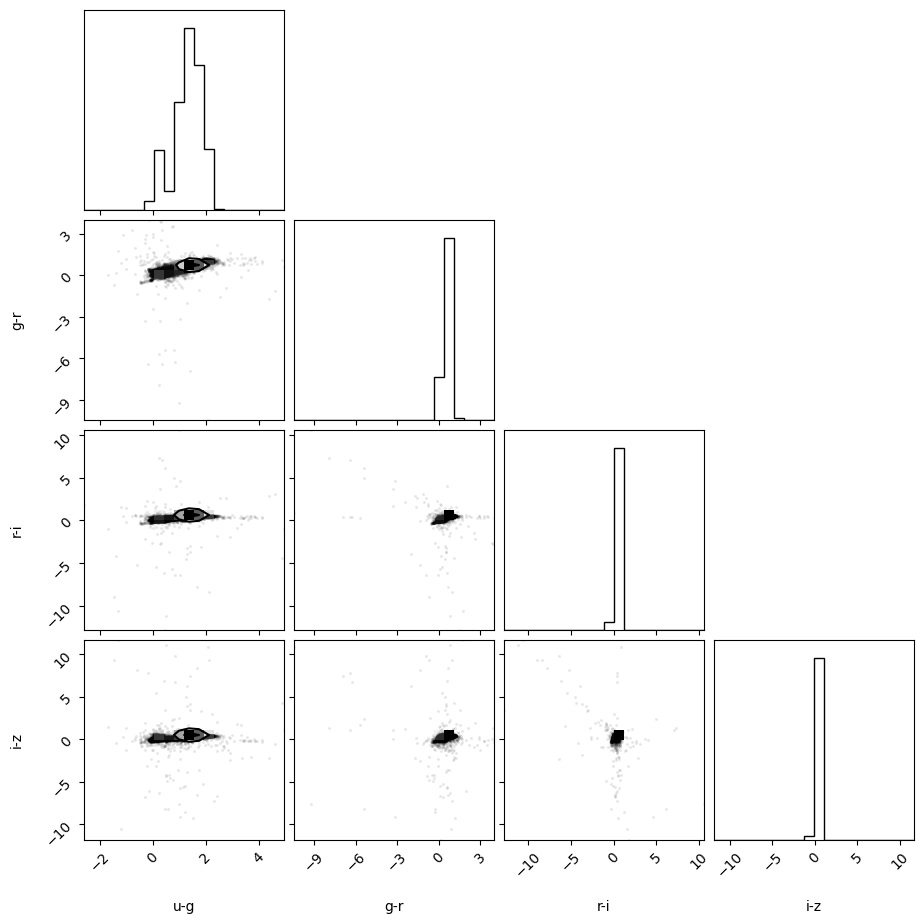

In [7]:
# Plot the distributions of the colors
corner.corner(colors, labels=colors_labels)

# Otherwise it plots it twice
plt.show()

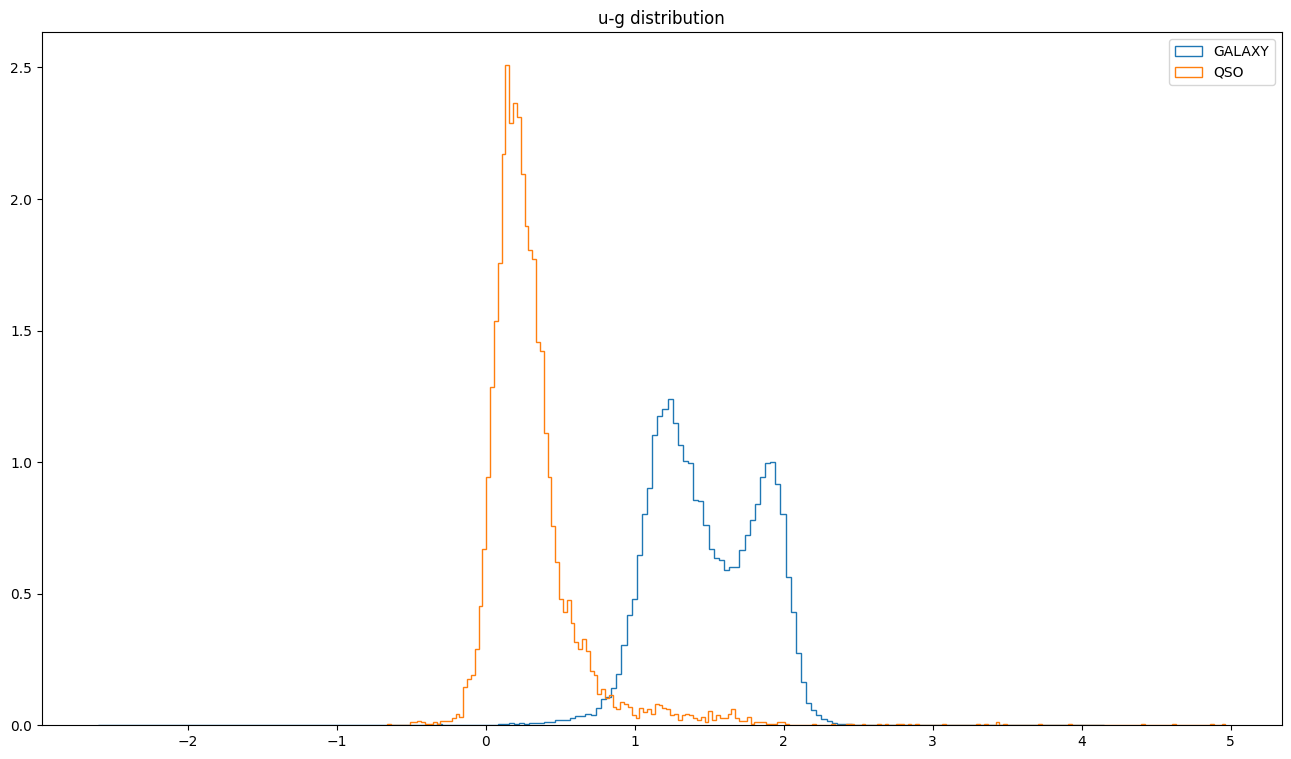

In [8]:
# Plot the u-g color distribution
fig, ax = plt.subplots(figsize = (16, 9))

ax.set_title("u-g distribution")

for cl in class_names:
    ax.hist(colors[:, colors_indexes['u-g']][classes == cl],
            bins='auto', density=True, histtype='step', label=cl)
    
ax.legend()

plt.show()

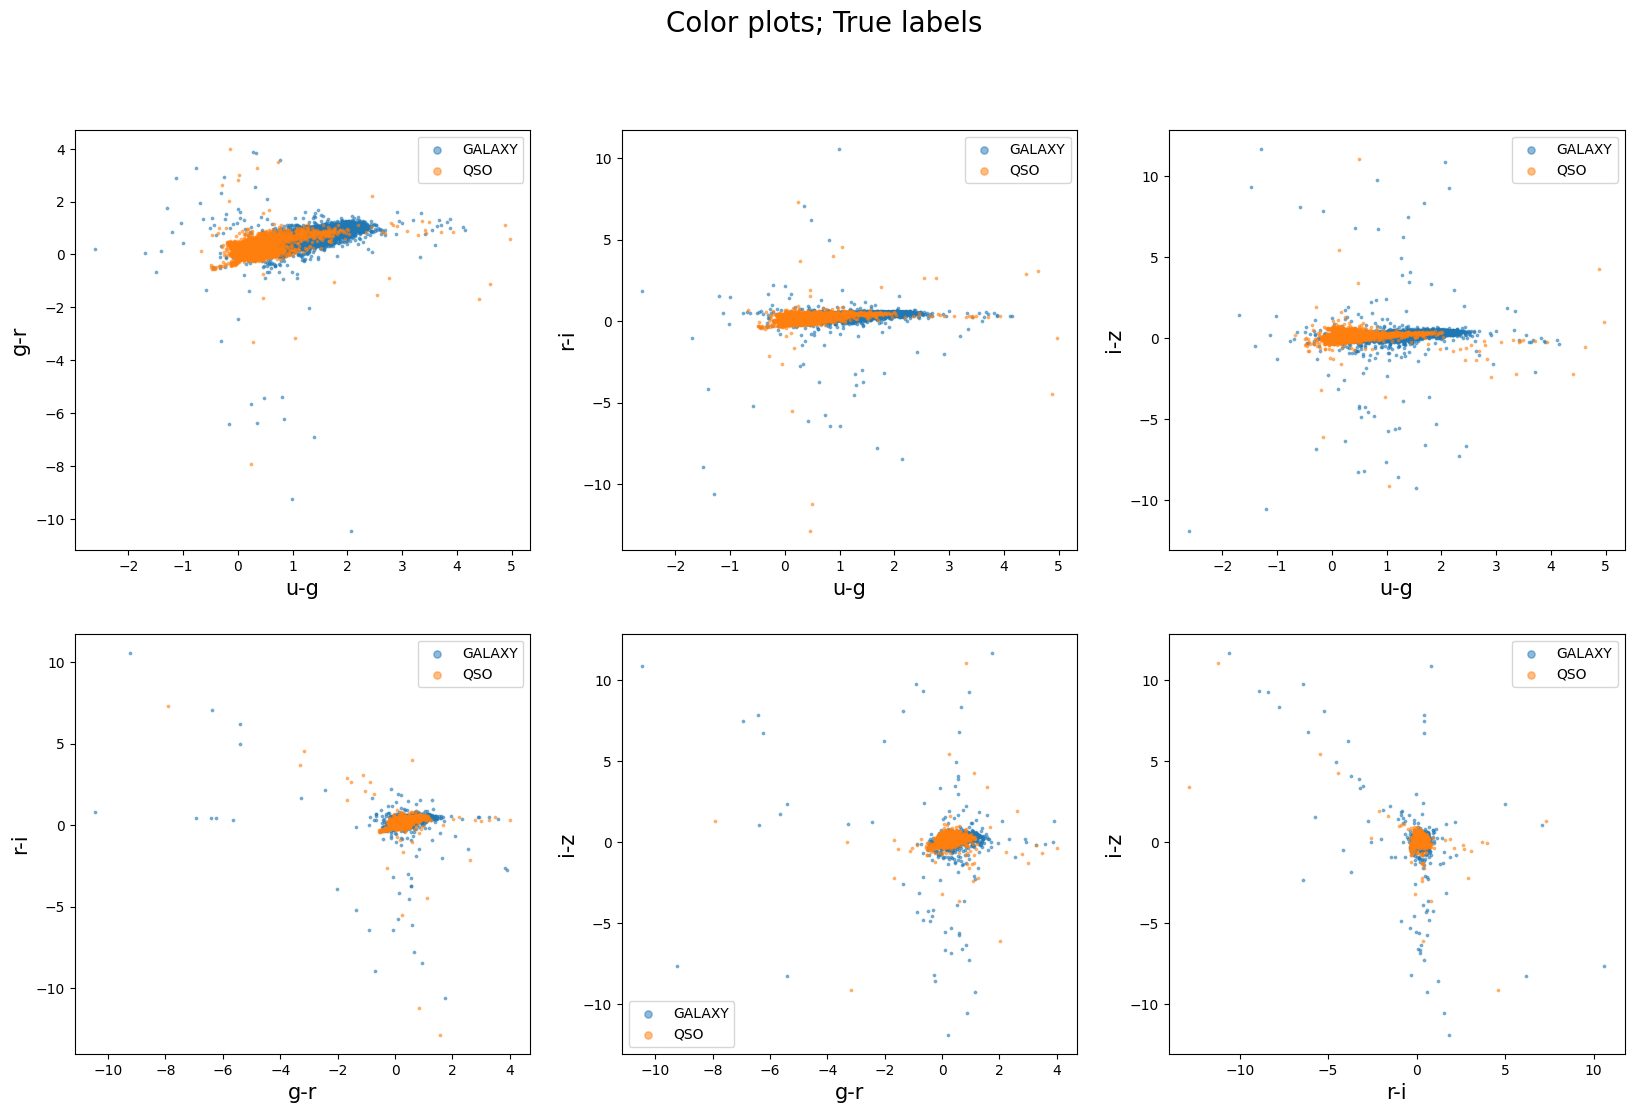

In [9]:
# Plot every components combination
fig = plt.figure(figsize=(20, 12))

fig.suptitle("Color plots; True labels", size=20)

# Compute the number of plots needed to represent every possible combination
# of 2 of the colors: n(n-1)/2. n = 4 ---> 6 plots
n_plots = int(len(colors_labels) * (len(colors_labels) - 1) / 2)

index = 1
for i in range(len(colors_labels)):
    for j in range(i + 1, len(colors_labels)):
        ax = fig.add_subplot(math.ceil(n_plots / 3), 3, index)
        ax.set_xlabel(colors_labels[i], size=15)
        ax.set_ylabel(colors_labels[j], size=15)

        # Plot the classes separately
        for cl in class_names:
             ax.scatter(colors[:, i][classes == cl],
                        colors[:, j][classes == cl],
                        alpha=0.5, label=cl, s=3)
             
        ax.legend(markerscale=3)
        
        index += 1

plt.show()

In [10]:
# Split the data into a training set and a test set
training_set, test_set, training_target, test_target = \
    train_test_split(colors, galaxyquasar['class'], train_size=0.8)

print(training_set.shape, test_set.shape, training_target.shape, test_target.shape)

(40000, 4) (10000, 4) (40000,) (10000,)


In [11]:
# Define the classifiers
classifiers = [GaussianNB(),
               LinearDiscriminantAnalysis(),
               QuadraticDiscriminantAnalysis(),
               LogisticRegression(),
               KNeighborsClassifier(),
               DecisionTreeClassifier()]

# Train on subset of colors

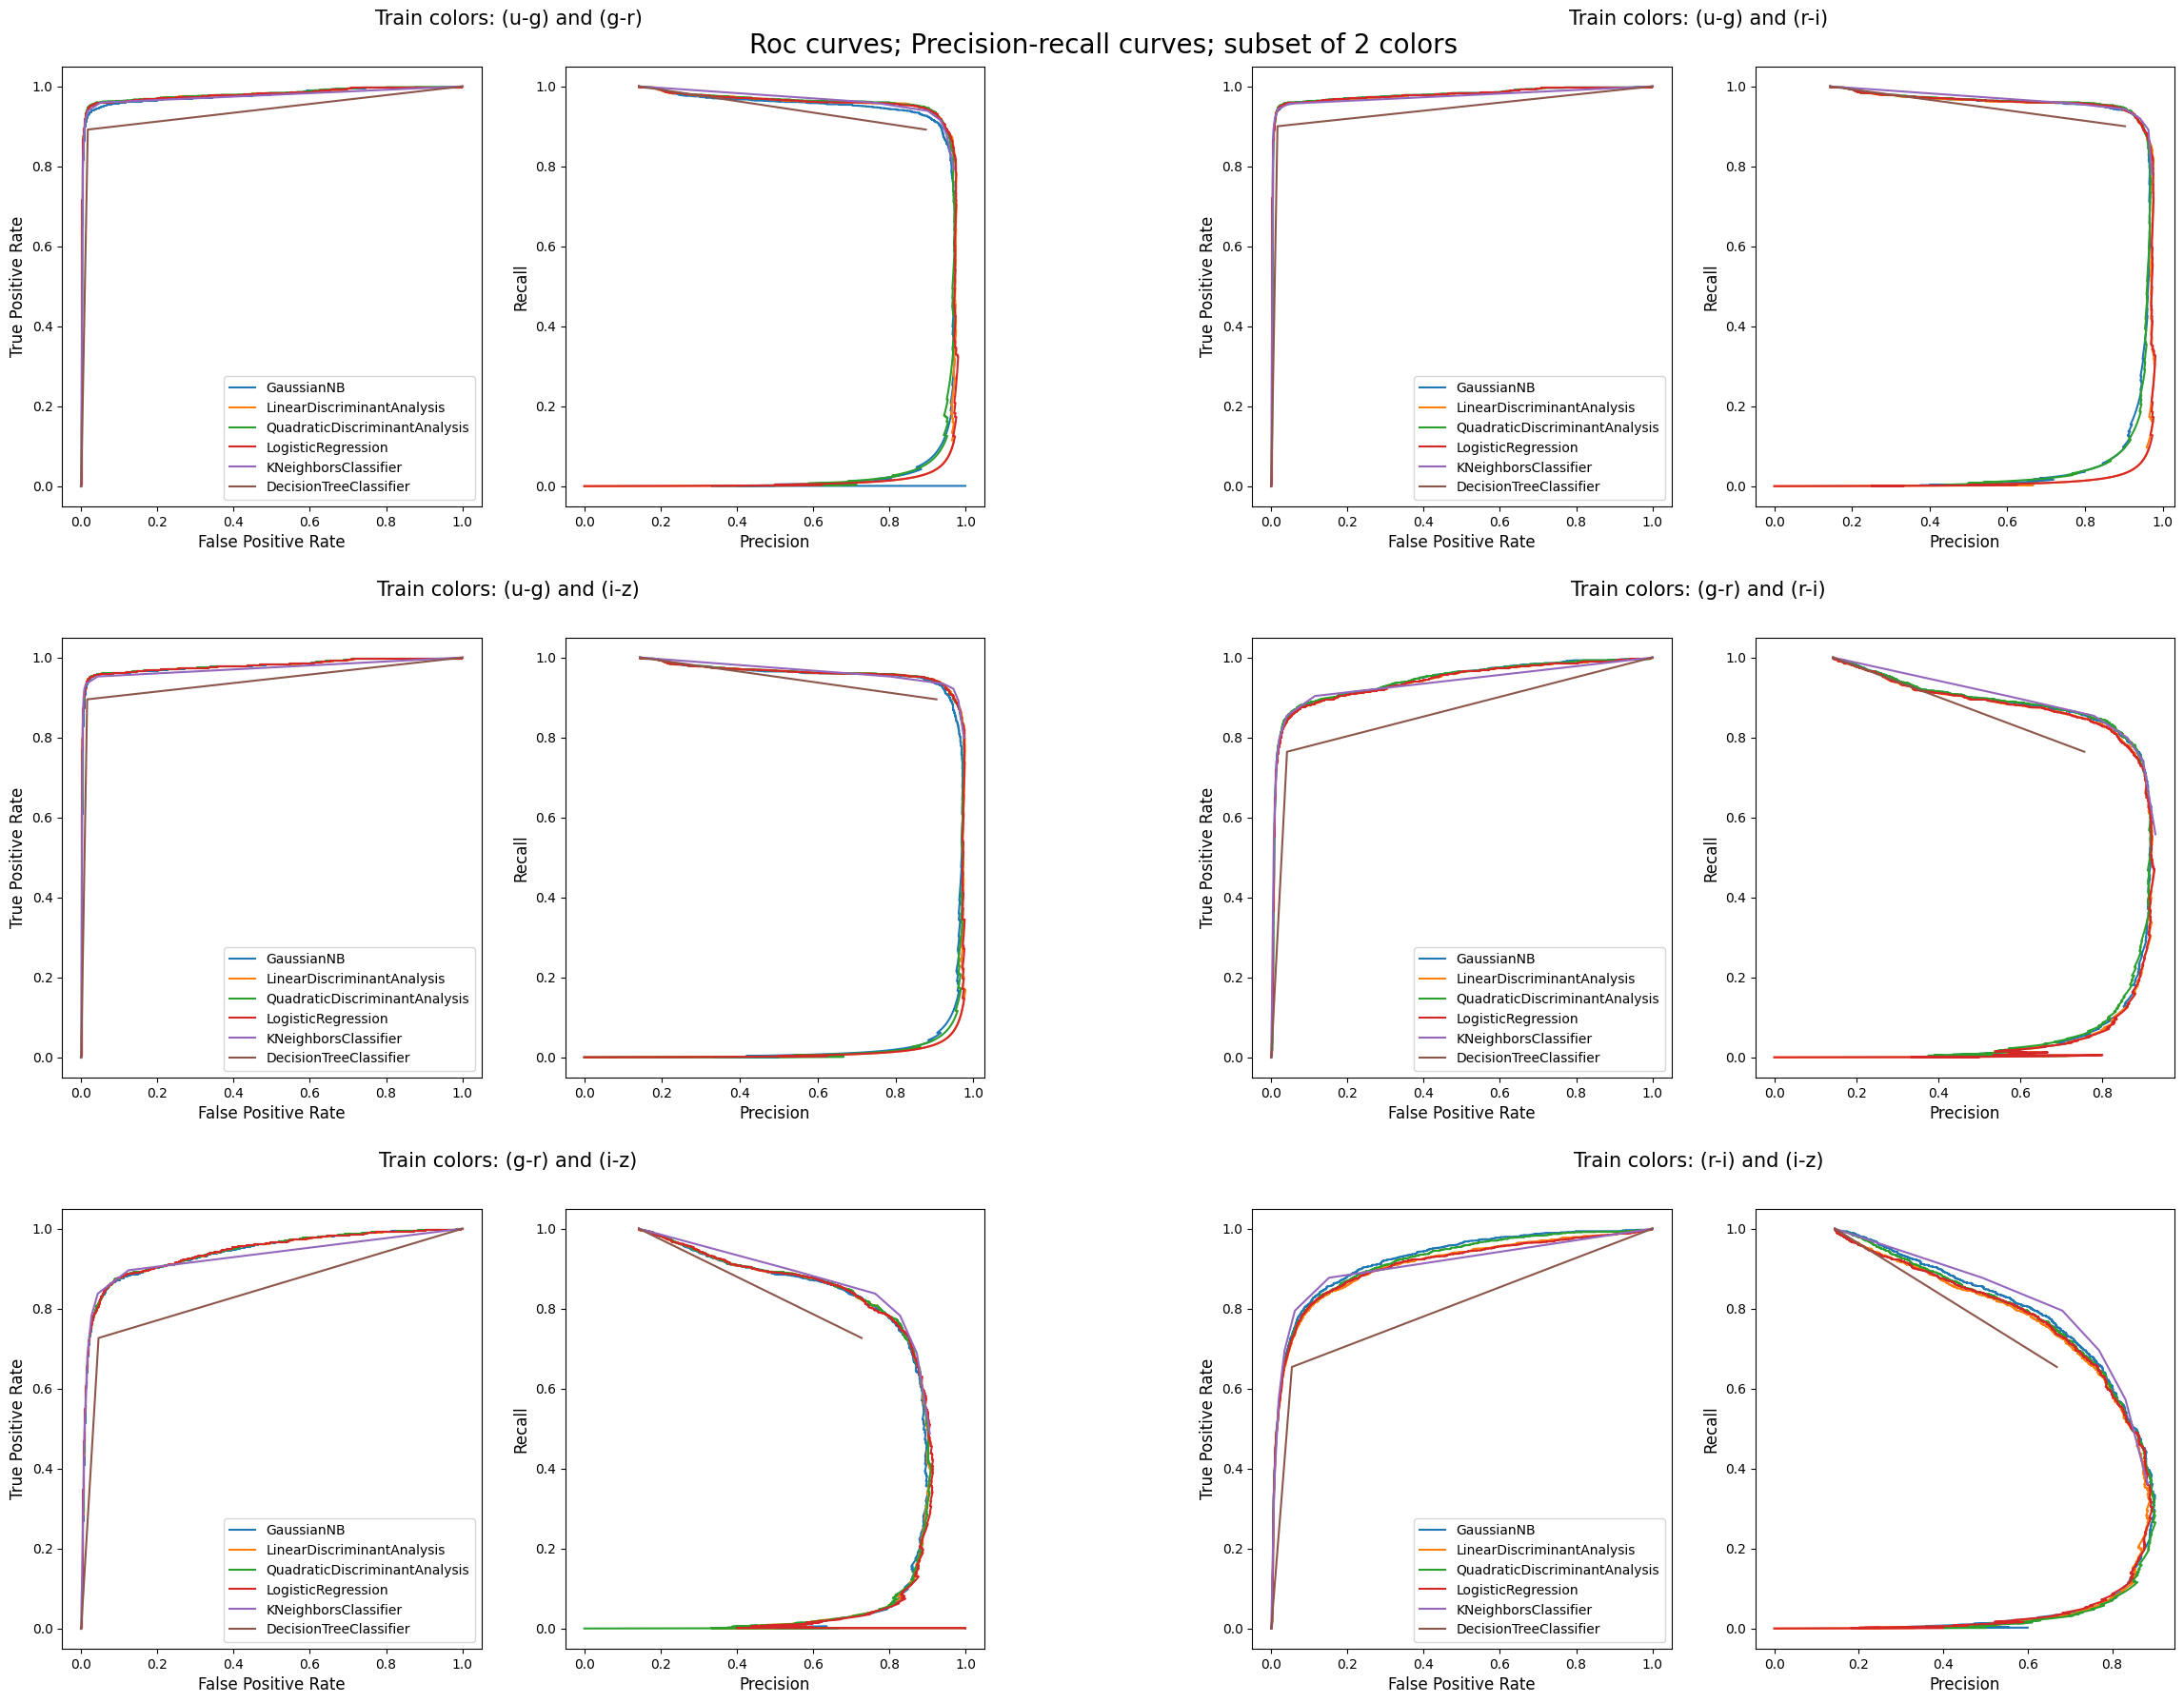

In [12]:
fig = plt.figure(figsize=(25, 18))

gridspec = iter(fig.add_gridspec(math.ceil(n_plots / 2), 2))

fig.suptitle("Roc curves; Precision-recall curves; subset of 2 colors", size=20)

for i in range(len(colors_labels)):
    for j in range(i + 1, len(colors_labels)):
        train = np.column_stack([training_set[:, i], training_set[:, j]])
        test = np.column_stack([test_set[:, i], test_set[:, j]])

        # Train the classifiers
        for clf in classifiers:
            clf.fit(train, training_target)

        # Make predictions with each classifier
        clf_predictions = [clf.predict(test) for clf in classifiers]
        qso_probs = [clf.predict_proba(test)[:, 1] for clf in classifiers]

        # roc_curves[clf][fpr, tpr, threshold: (0, 1, 2)]
        roc_curves = [roc_curve(test_target, qso_probs[i], pos_label=1)
                      for i in range(len(classifiers))]

        # prec_rec_curves[clf][prec, rec, threshold: (0, 1, 2)]
        prec_rec_curves = [precision_recall_curve(test_target, qso_probs[i], pos_label=1)
                           for i in range(len(classifiers))]

        # Plot the curves
        subfig = fig.add_subfigure(next(gridspec))

        subfig.suptitle('Train colors: ({0}) and ({1})'.format(colors_labels[i],
                                                               colors_labels[j]), size=15)

        axes = [subfig.add_subplot(1, 2, i) for i in range(1, 2 + 1)]

        axes[0].set_xlabel("False Positive Rate", size=12)
        axes[0].set_ylabel("True Positive Rate", size=12)

        axes[1].set_xlabel("Precision", size=12)
        axes[1].set_ylabel("Recall", size=12)

        # Make a plot for each classifier
        for clf, k in zip(classifiers, range(len(classifiers))):
            axes[0].plot(roc_curves[k][0], roc_curves[k][1],
                         label=clf.__class__.__name__)
            # Discard last element. See the documentation of precision_recall_curve()
            axes[1].plot(prec_rec_curves[k][0][:-1], prec_rec_curves[k][1][:-1],
                         label=clf.__class__.__name__)

            axes[0].legend()

plt.show()

# Train on all colors

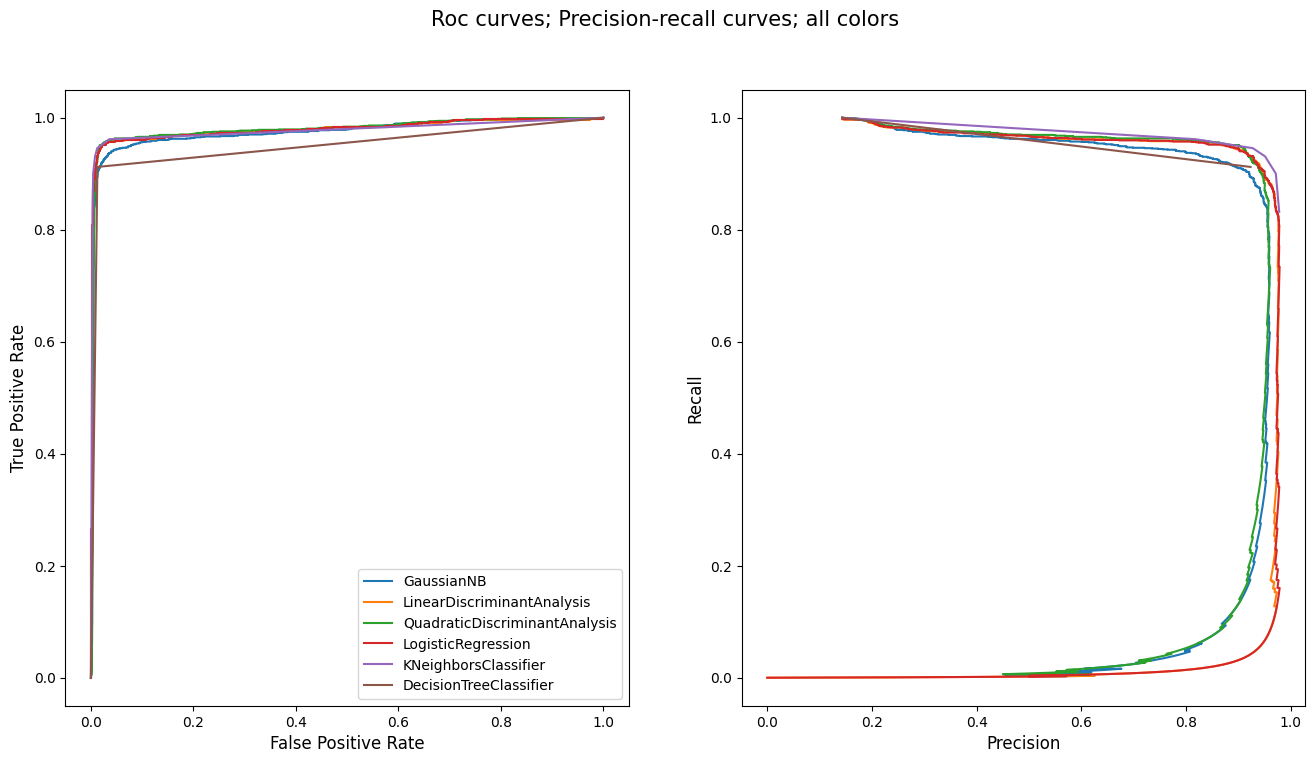

In [13]:
# Train the classifiers
for clf in classifiers:
    clf.fit(training_set, training_target)

# Make predictions with each classifier
clf_predictions = [clf.predict(test_set) for clf in classifiers]
qso_probs = [clf.predict_proba(test_set)[:, 1] for clf in classifiers]

# roc_curves[clf][fpr, tpr, threshold: (0, 1, 2)]
roc_curves = [roc_curve(test_target, qso_probs[i], pos_label=1)
              for i in range(len(classifiers))]

# prec_rec_curves[clf][prec, rec, threshold: (0, 1, 2)]
prec_rec_curves = [precision_recall_curve(test_target, qso_probs[i], pos_label=1)
                   for i in range(len(classifiers))]

# Plot curves
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

fig.suptitle("Roc curves; Precision-recall curves; all colors", size=15)

axes[0].set_xlabel("False Positive Rate", size=12)
axes[0].set_ylabel("True Positive Rate", size=12)

axes[1].set_xlabel("Precision", size=12)
axes[1].set_ylabel("Recall", size=12)

for clf, i in zip(classifiers, range(len(classifiers))):
    axes[0].plot(roc_curves[i][0], roc_curves[i][1],
                 label=clf.__class__.__name__)
    axes[1].plot(prec_rec_curves[i][0][:-1], prec_rec_curves[i][1][:-1],
                 label=clf.__class__.__name__)
    
    axes[0].legend()

plt.show()

## Plots of the predictions

In [14]:
# Support function to plot prediction on data for a certain classifier
# USES EXTERNAL VARIABLES
def plot_prediction_data(clf_index):
    fig = plt.figure(figsize=(20, 12))

    fig.suptitle("Color plots; {0} prediction".format(classifiers[clf_index].__class__.__name__),
                 size=20)

    n_plots = int(len(colors_labels) * (len(colors_labels) - 1) / 2)

    index = 1
    for i in range(len(colors_labels)):
        for j in range(i + 1, len(colors_labels)):
            ax = fig.add_subplot(math.ceil(n_plots / 3), 3, index)
            ax.set_xlabel(colors_labels[i], size=15)
            ax.set_ylabel(colors_labels[j], size=15)

            # Plot the classes separately
            for cl in class_names:
                ax.scatter(test_set[:, i][le.inverse_transform(clf_predictions[clf_index]) == cl],
                           test_set[:, j][le.inverse_transform(clf_predictions[clf_index]) == cl],
                           alpha=0.5, label=cl, s=3)
                
            ax.legend(markerscale=3)
            
            index += 1
    
    # Print the accuracy score and the confusion matrix
    print("{clf}\n\n"
          "Accuracy score = {acc}\n"
          "CONFUSION MATRIX\n"
          "{conf_mat}".format(clf=classifiers[clf_index].__class__.__name__,
                              acc=accuracy_score(test_target, clf_predictions[clf_index]),
                              conf_mat=confusion_matrix(test_target, clf_predictions[clf_index])))

    plt.show()

GaussianNB

Accuracy score = 0.9711
CONFUSION MATRIX
[[8398  168]
 [ 121 1313]]


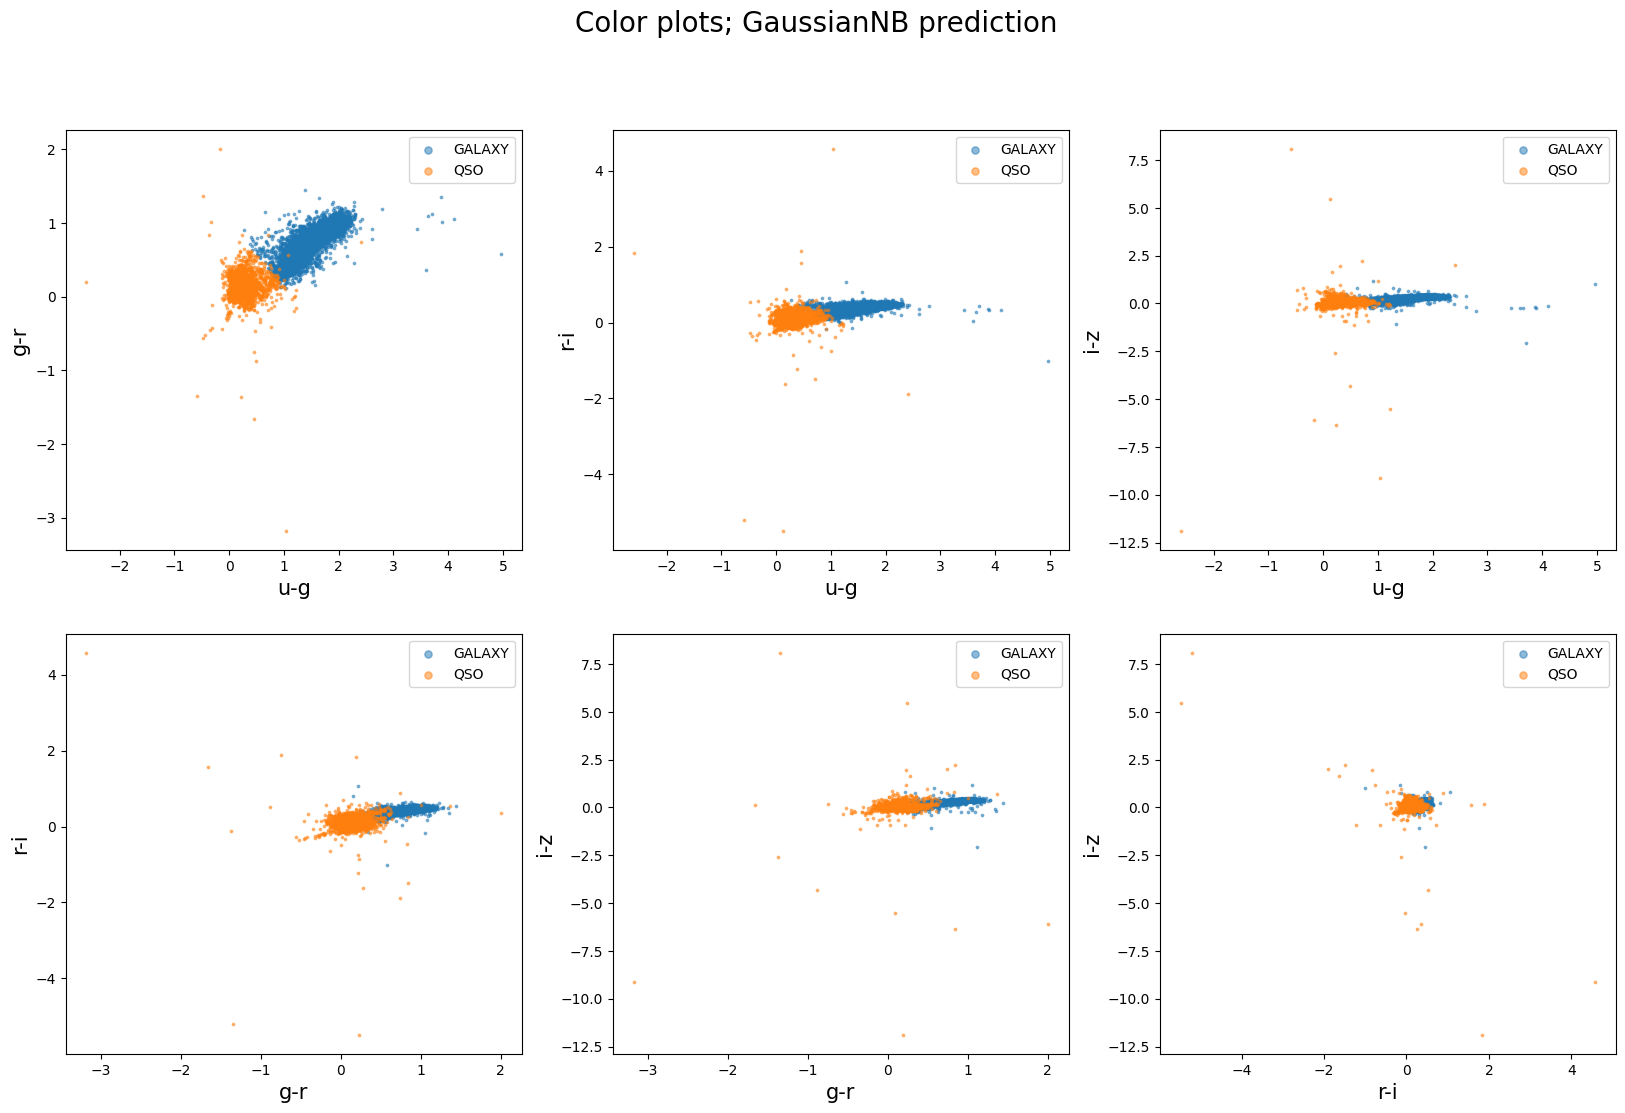

LinearDiscriminantAnalysis

Accuracy score = 0.9795
CONFUSION MATRIX
[[8477   89]
 [ 116 1318]]


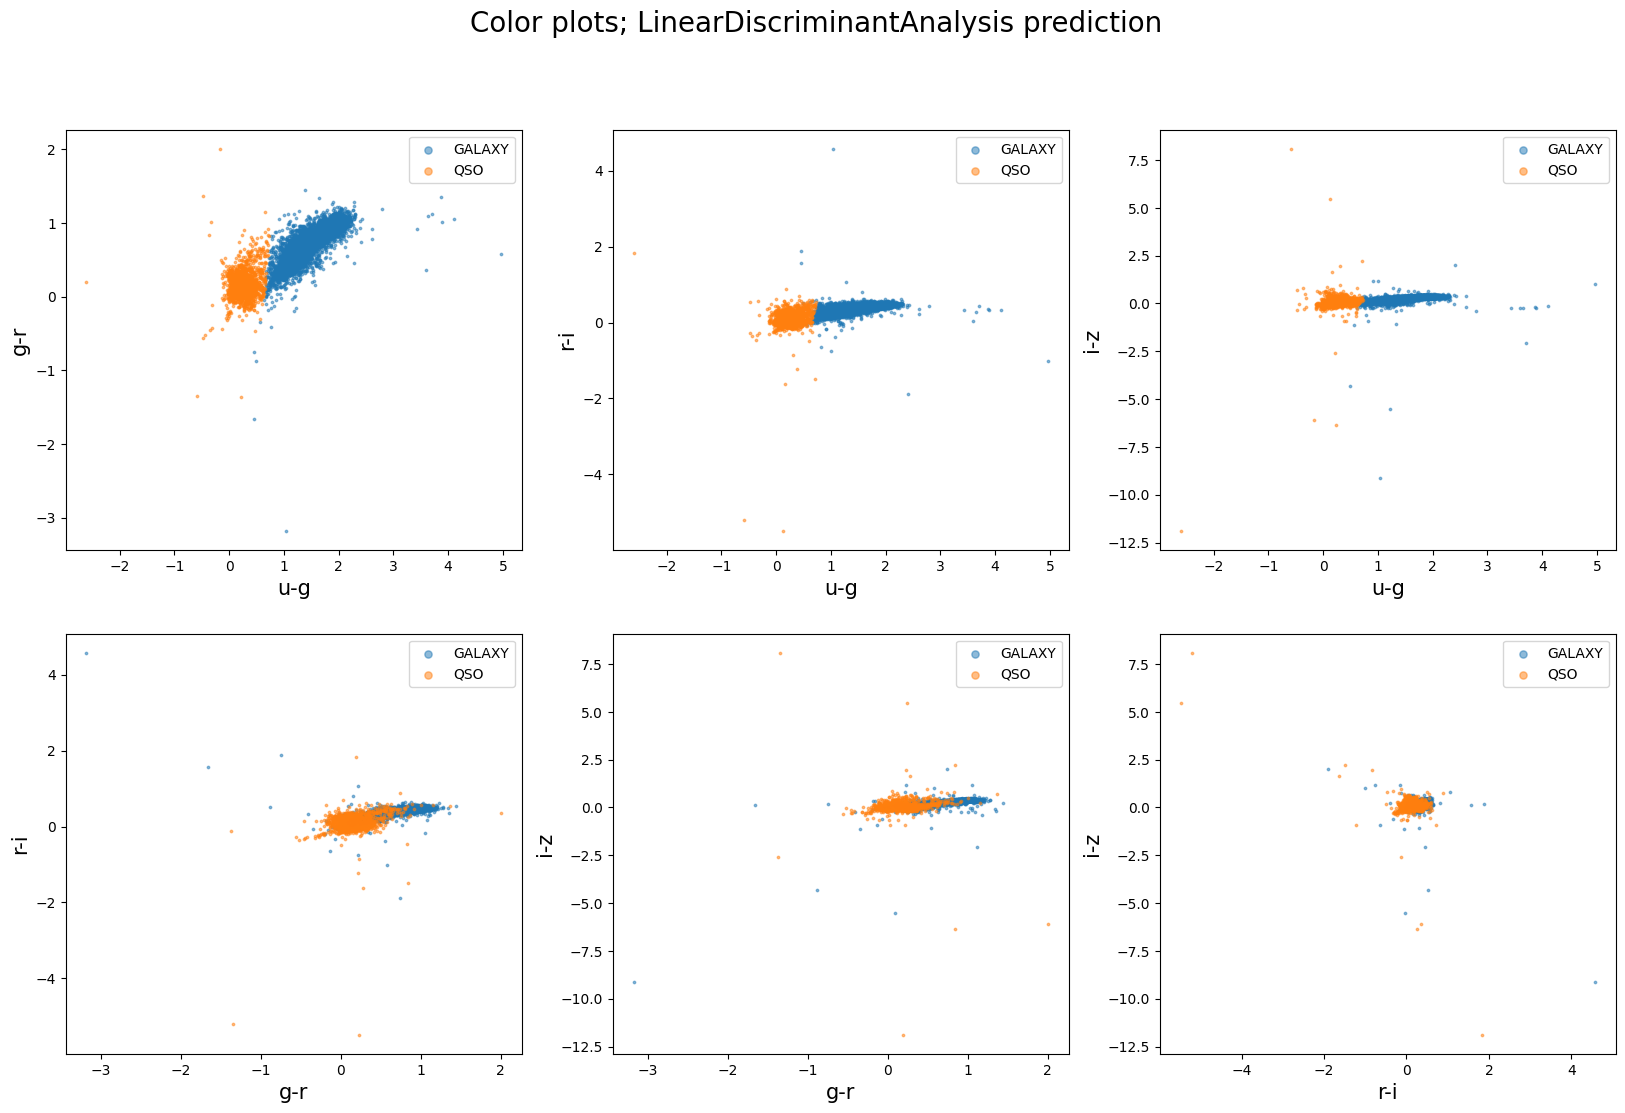

QuadraticDiscriminantAnalysis

Accuracy score = 0.9787
CONFUSION MATRIX
[[8470   96]
 [ 117 1317]]


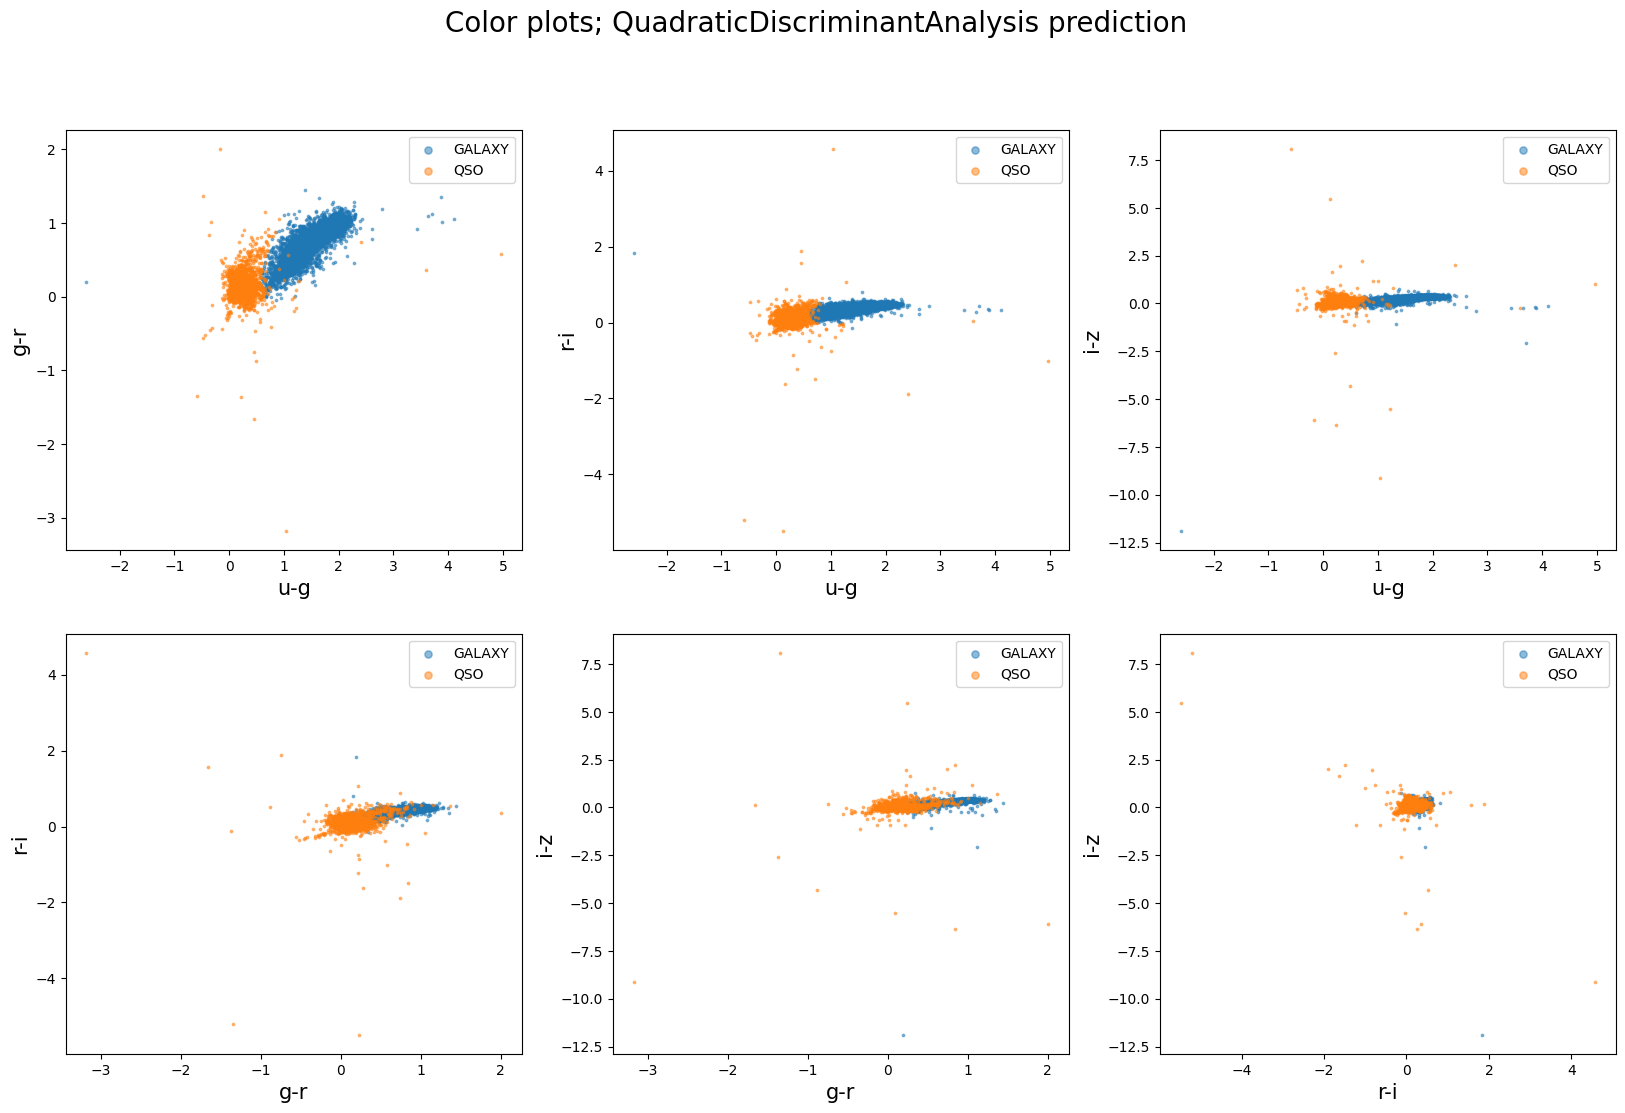

LogisticRegression

Accuracy score = 0.9791
CONFUSION MATRIX
[[8487   79]
 [ 130 1304]]


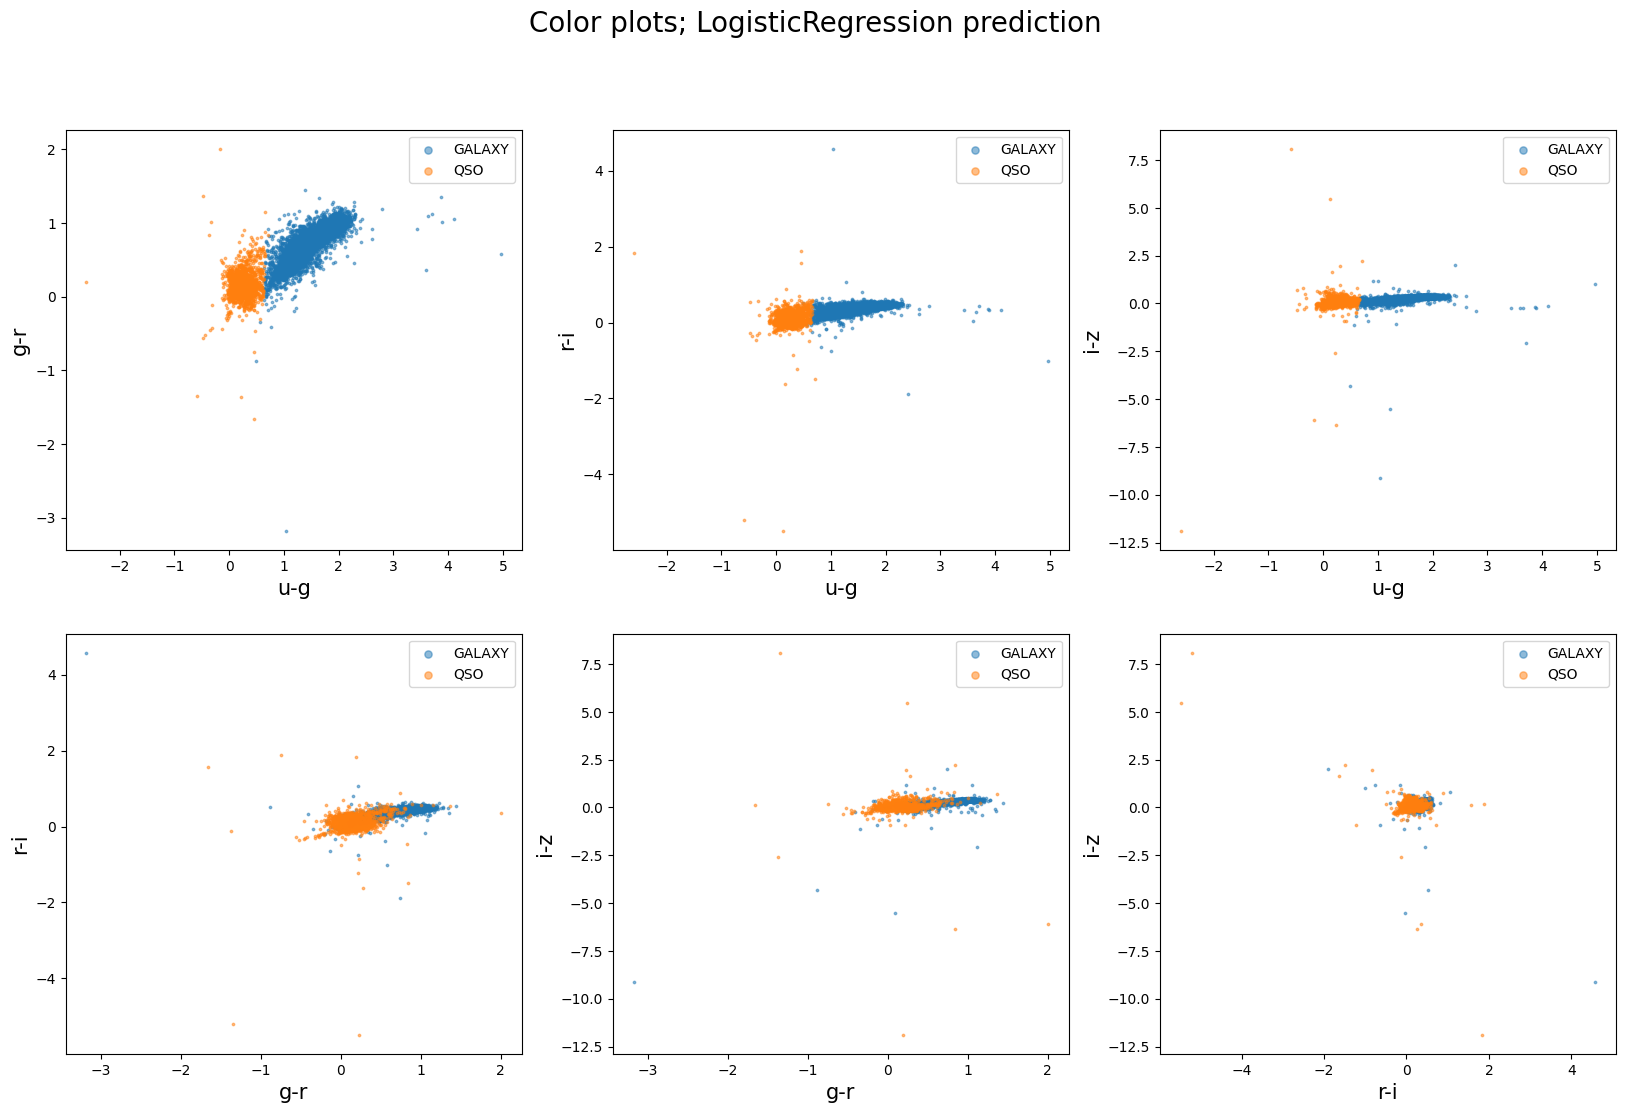

KNeighborsClassifier

Accuracy score = 0.9832
CONFUSION MATRIX
[[8497   69]
 [  99 1335]]


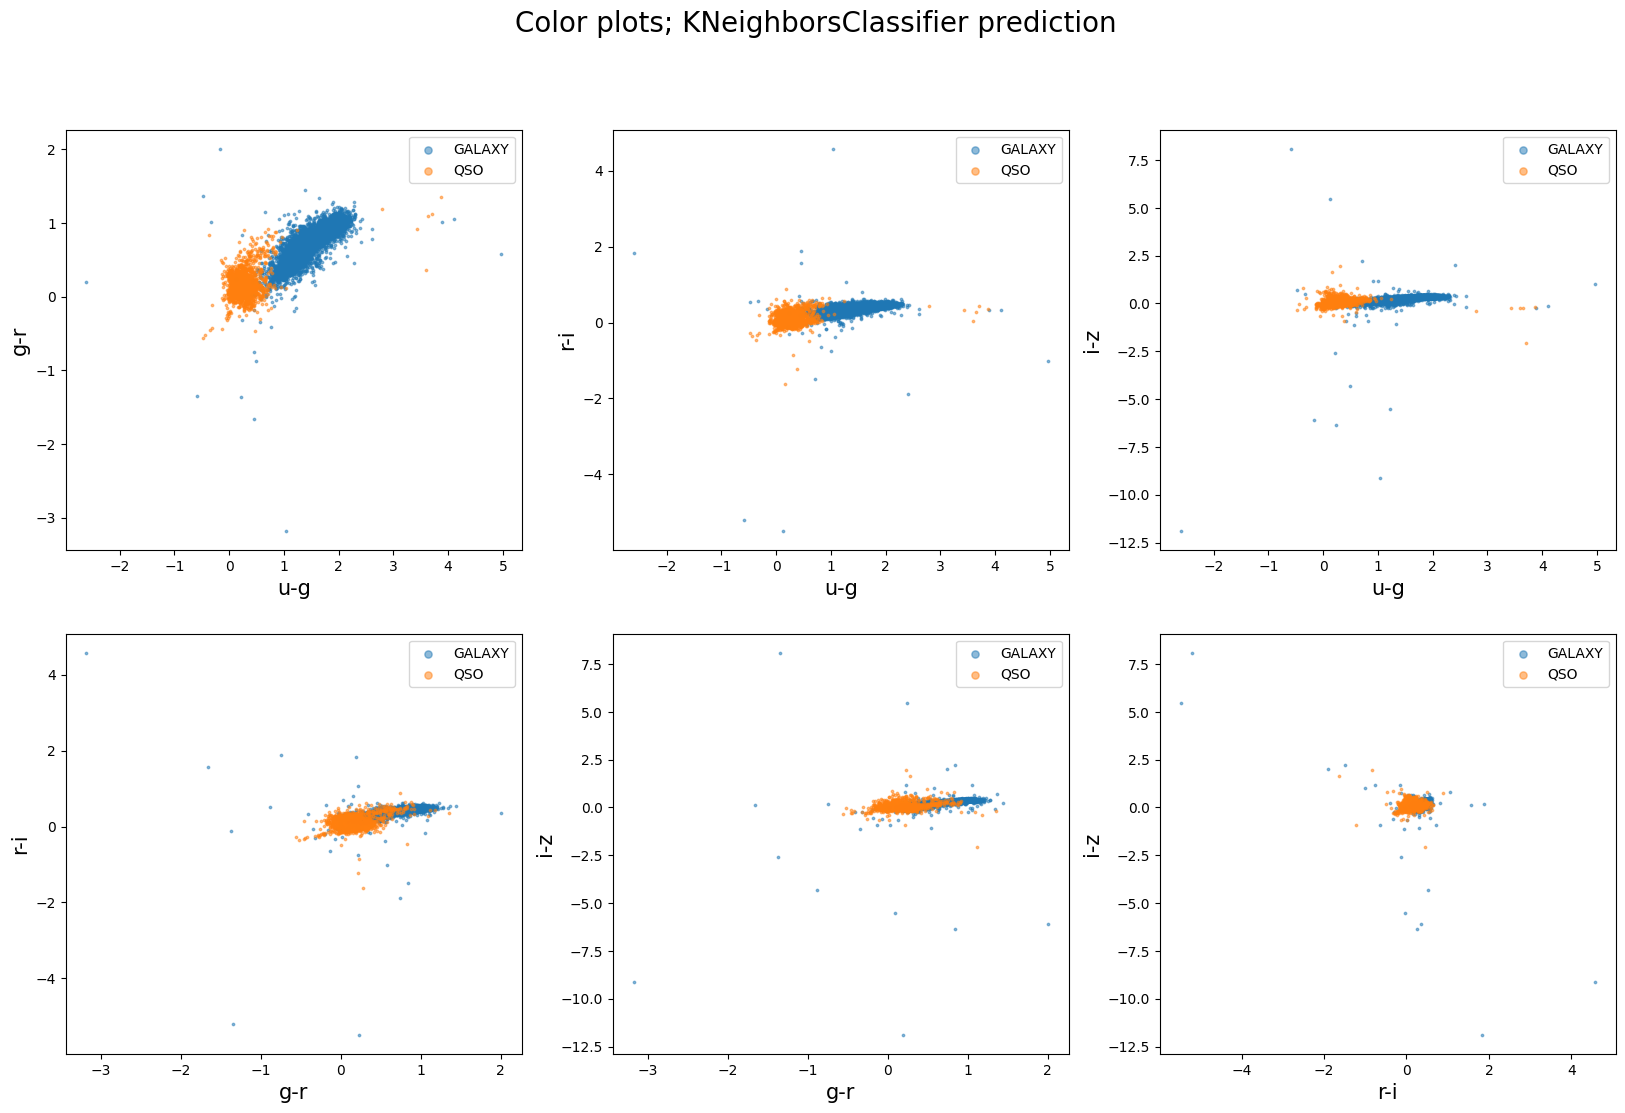

DecisionTreeClassifier

Accuracy score = 0.9765
CONFUSION MATRIX
[[8457  109]
 [ 126 1308]]


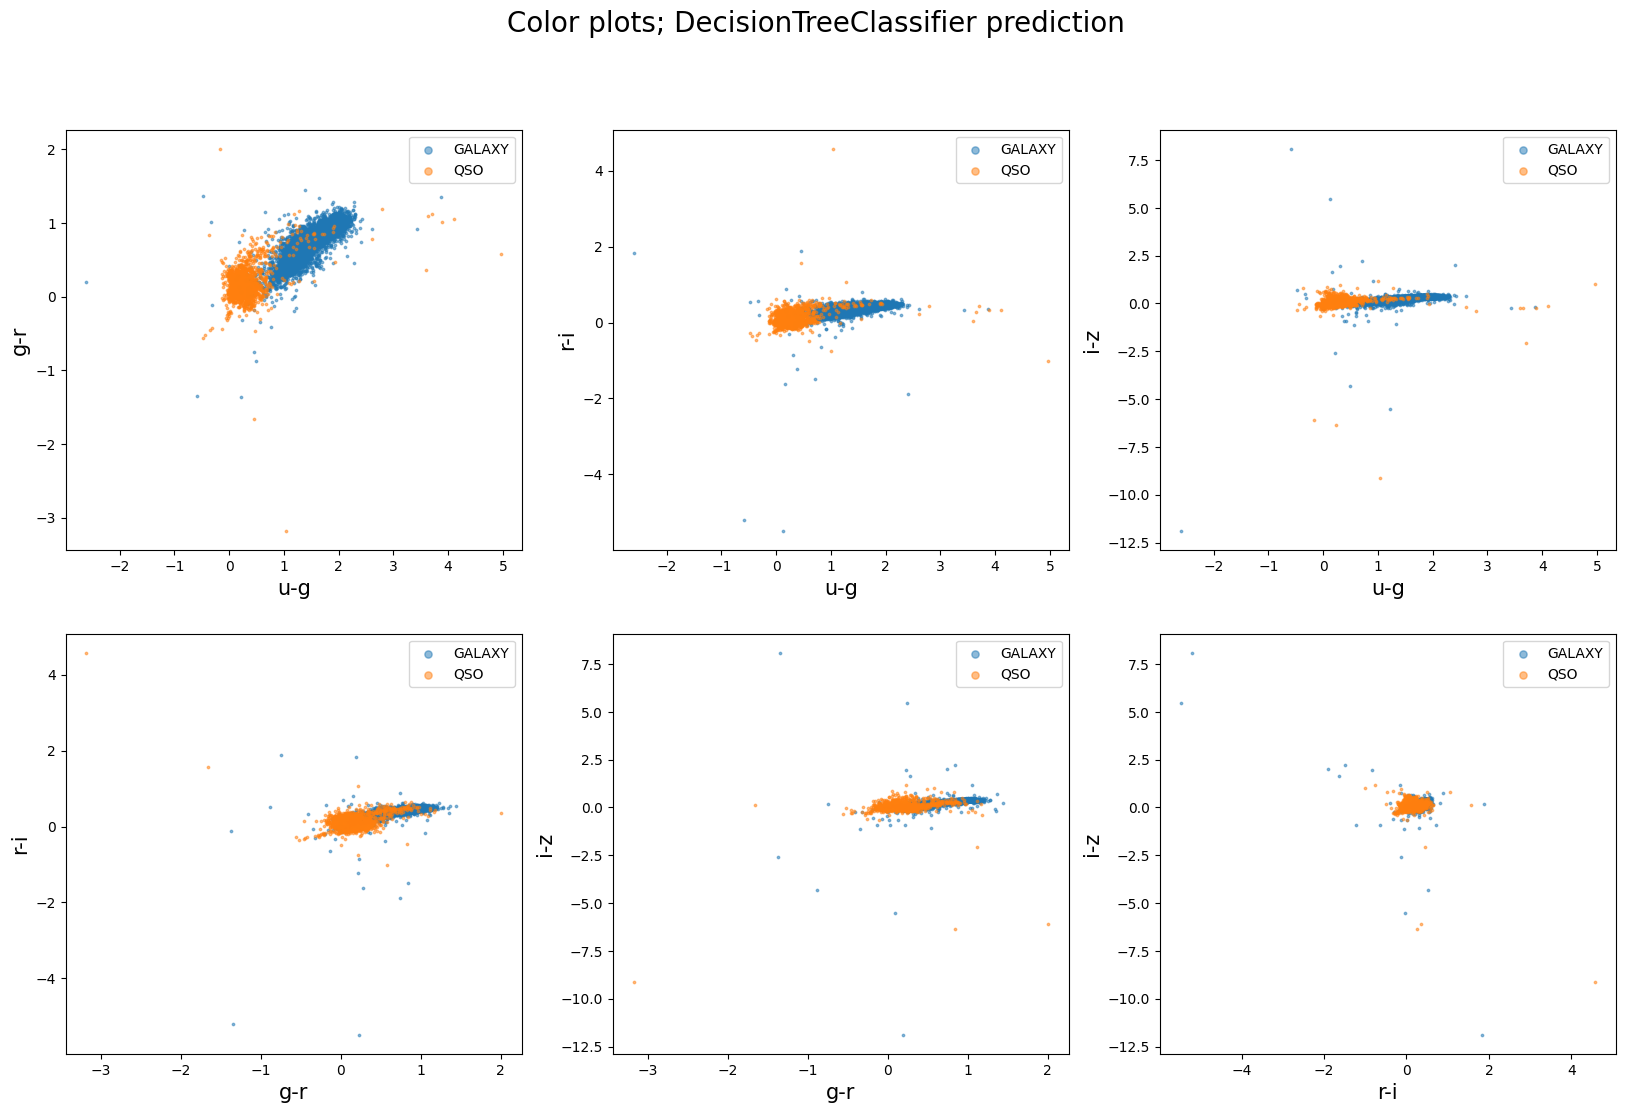

In [15]:
for i in range(len(classifiers)):
    plot_prediction_data(i)